<a href="https://colab.research.google.com/github/Janies-Garcia-Velasco/simulacion-n-2/blob/main/serpientes_y_escaleras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import matplotlib.pyplot as plt

In [ ]:
#funcion para el tablero sin serpientes ni escaleras

def tablero_libre():

  #definimos la casilla en donde comienza la ficha, la cual es fuera del tablero
  casilla=0

  #definimos la tirada la cual debe comenzar en no llevar ninguna
  tirada=0

  #guardamos posicion para la grafica
  posiciones=[casilla]


  while casilla < 20:

    tirada+=1

    #se hace la simulacion del dado con resultados entre el 1 y el 6
    dado=random.randint(1,6)

    #posicion en la que termina
    casilla_nueva = casilla + dado

    if casilla_nueva > 20:

      #regresamos en el juego al inicio
      casilla_nueva = casilla

    casilla=casilla_nueva
    posiciones.append(casilla)

  return tirada, posiciones

In [ ]:
#simulacion de una partida de juego

tirada, posiciones = tablero_libre()

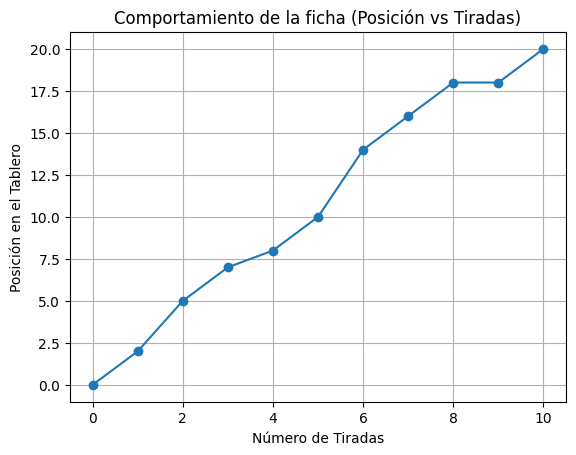

In [ ]:
# Graficar el comportamiento de la ficha
plt.plot(range(len(posiciones)), posiciones, marker='o')
plt.title("Comportamiento de la ficha (Posición vs Tiradas)")
plt.xlabel("Número de Tiradas")
plt.ylabel("Posición en el Tablero")
plt.grid(True)
plt.show()

In [ ]:
import random

# Función para simular una partida de Serpientes y Escaleras
def tablero_completo():
    casilla = 0  # El jugador comienza fuera del tablero
    tiradas = 0   # Contador de tiradas
    posiciones=[casilla] #guardamos posicion para grafica

    while casilla < 20:  # El juego termina cuando el jugador llega o supera la casilla 20
        dado = random.randint(1, 6)  # Tirada del dado (1 a 6)
        casilla += dado  # Avanzar el número de casillas indicado por el dado
        tiradas+=1

        # Si la posición excede la casilla 20, no se avanza más allá
        if casilla > 20:
            casilla == 20

        # Verificar si se cae en una serpiente o escalera
        elif casilla == 13:
            casilla == 4
        elif casilla == 17:
            casilla == 10
        elif casilla == 3:
            casilla == 11
        elif casilla == 15:
            casilla == 19

        posiciones.append(casilla)

    return tiradas, posiciones

# Función para simular múltiples partidas y calcular el promedio de tiradas
def simular_varias_partidas(n_simulaciones):
    resultados = [tablero_completo() for _ in range(n_simulaciones)]  # Simular varias partidas
    promedio_tiradas = sum(resultado[0] for resultado in resultados) / n_simulaciones  # Calcular el promedio de tiradas
    return promedio_tiradas

# Realizar 100,000 simulaciones para obtener el promedio
n_simulaciones = 1000
promedio_tiradas = simular_varias_partidas(n_simulaciones)
print(f'Promedio de tiradas necesarias: {promedio_tiradas:.2f}')


Promedio de tiradas necesarias: 6.18


In [ ]:
#simulacion de una partida de juego
tiradas, posiciones = tablero_completo()

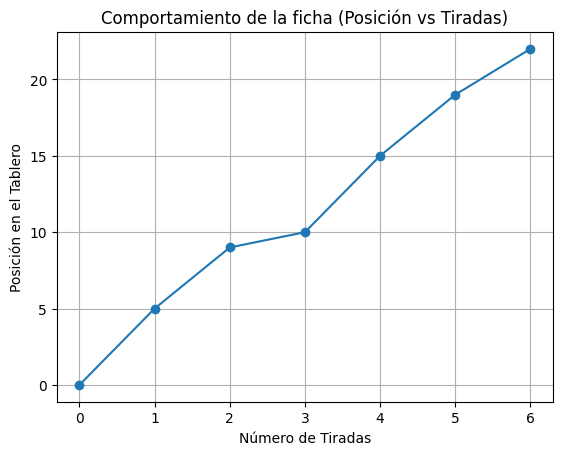

In [ ]:
# Graficar el comportamiento de la ficha
plt.plot(range(len(posiciones)), posiciones, marker='o')
plt.title("Comportamiento de la ficha (Posición vs Tiradas)")
plt.xlabel("Número de Tiradas")
plt.ylabel("Posición en el Tablero")
plt.grid(True)
plt.show()

### Explicación Analítica usando Cadenas de Markov

El juego de Serpientes y Escaleras, desde una perspectiva probabilística, se puede modelar como una **cadena de Markov**. Una cadena de Markov describe un proceso estocástico donde el estado futuro del sistema (en este caso, la casilla en la que se encuentra el jugador) depende únicamente del estado actual, y no de los estados pasados.

En este modelo, las casillas del tablero representan los **estados** del sistema, y las probabilidades de moverse de una casilla a otra en cada turno están determinadas por las reglas del juego (el lanzamiento del dado, las serpientes y las escaleras).

#### 1. **Matriz de transición \( P \)**
La **matriz de transición** \( P \) es una matriz que contiene las probabilidades de moverse de una casilla a otra en un solo turno. En este caso, las probabilidades dependen del resultado del dado, que puede ser 1, 2, 3, 4, 5 o 6. Además, las casillas con serpientes o escaleras tienen probabilidades ajustadas debido a su comportamiento especial (escaleras avanzan y serpientes retroceden).

En nuestro modelo, consideramos solo las casillas 1 a 19 como estados transitorios (donde el jugador puede moverse), mientras que la casilla 20 es **absorbente**, ya que cuando el jugador llega allí, el juego termina.

La **submatriz \( Q \)** es una parte de la matriz de transición que describe las probabilidades de moverse entre los estados transitorios, es decir, entre las casillas del 1 al 19. La casilla 20 es un estado absorbente, lo que significa que una vez que el jugador llega allí, no se mueve más.

#### 2. **Estados absorbentes**
En el modelo de cadenas de Markov, un **estado absorbente** es aquel en el que, una vez que el sistema llega a él, no puede salir. En este caso, la casilla 20 es absorbente, ya que el juego termina cuando el jugador llega allí.

#### 3. **Matriz fundamental \( N \)**
La **matriz fundamental** \( N \) es clave para calcular el número esperado de tiradas necesarias para llegar a la casilla 20. Esta matriz se define como:

\[
N = (I - Q)^{-1}
\]

Donde:
- \( I \) es la **matriz identidad** (una matriz con 1s en la diagonal y 0s en todas las demás posiciones).
- \( Q \) es la submatriz de la matriz de transición que excluye el estado absorbente (es decir, describe las transiciones entre los estados 1 a 19).
- \( N_{ij} \) representa el número esperado de visitas al estado \( j \) comenzando desde el estado \( i \), antes de ser absorbido por la casilla 20.

#### 4. **Cálculo del número esperado de tiradas**
Para calcular el número esperado de tiradas necesarias para llegar a la casilla 20, usamos la siguiente fórmula:

\[
t = N \cdot \mathbf{1}
\]

Donde:
- \( \mathbf{1} \) es un vector columna de unos (con longitud igual al número de estados transitorios, en este caso 19).
- El producto \( N \cdot \mathbf{1} \) nos da un vector donde cada entrada corresponde al número esperado de tiradas desde la casilla respectiva hasta llegar a la casilla 20.

### Explicación paso a paso:

1. **Transición entre casillas**: La probabilidad de moverse entre casillas se distribuye uniformemente debido a que el dado tiene 6 caras. Por ejemplo, desde la casilla 1, hay una probabilidad de \( \frac{1}{6} \) de moverse a las casillas 2, 3, 4, 5, 6 o 7 en un solo turno.

2. **Ajustes por escaleras y serpientes**: Las escaleras (de la casilla 3 a la 11 y de la 15 a la 19) y las serpientes (de la casilla 17 a la 10 y de la 13 a la 4) alteran las probabilidades, ya que una vez que el jugador cae en una de estas casillas, su posición cambia automáticamente. Estas reglas están incorporadas en la matriz \( Q \).

3. **Matriz fundamental \( N \)**: Calculamos \( N = (I - Q)^{-1} \) para obtener la matriz que describe el número esperado de veces que el jugador pasa por cada estado (casilla 1 a 19) antes de ser absorbido en la casilla 20.

4. **Número esperado de tiradas**: Finalmente, al multiplicar \( N \) por un vector de unos, obtenemos el número total esperado de tiradas para llegar a la casilla 20 desde cualquier otra casilla.

### Resumen:
- El tablero se modela como una cadena de Markov.
- El juego termina en la casilla 20, que es un estado absorbente.
- La matriz \( Q \) describe las transiciones entre las casillas (estados) del 1 al 19.
- Al calcular la matriz fundamental \( N \), obtenemos el número esperado de visitas a las casillas antes de llegar a la casilla 20.
- Finalmente, el número esperado de tiradas desde cualquier casilla se calcula usando \( N \) y un vector de unos.

Este proceso analítico permite estimar cuántas tiradas se necesitan, en promedio, para terminar el juego, y proporciona una visión clara de cómo el comportamiento probabilístico afecta el desarrollo del juego.

En el excel adjuntado se puede ver las probabilidades de la ficha al moverse